<a href="https://colab.research.google.com/github/chakrateja70/Classifying-movie-reviews/blob/main/classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 90ms/step - loss: 0.5276 - binary_accuracy: 0.7769 - val_loss: 0.3938 - val_binary_accuracy: 0.8665
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.3252 - binary_accuracy: 0.8925 - val_loss: 0.3424 - val_binary_accuracy: 0.8664
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2434 - binary_accuracy: 0.9183 - val_loss: 0.2832 - val_binary_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1946 - binary_accuracy: 0.9361 - val_loss: 0.2756 - val_binary_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1618 - binary_accuracy: 0.9448 - val_loss: 0.2915 - val_binary_accuracy: 0.8849
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1372 - binary_accuracy: 0.9572 - val_loss: 0.3215 - val_binary_accuracy: 0.8766
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - los

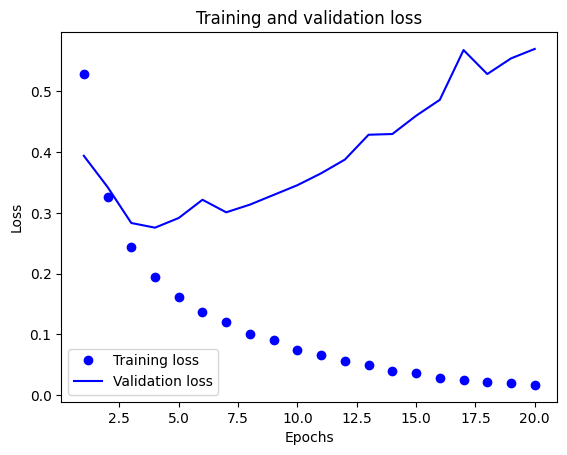

In [12]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

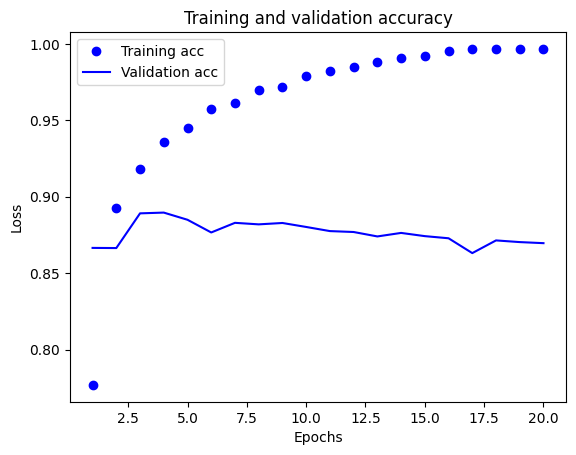

In [14]:
plt.clf()
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()